In [5]:
# Set up notebook
% matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Set global figure properties
import matplotlib as mpl
mpl.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'legend.fontsize': 16})

# Set default Seaborn plotting style
sns.set_style('white')

In [6]:
# Read the data
d = pd.read_csv('train.csv')
d.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [7]:
# Basic check on data
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### Data Cleaning and Data Imputation

- Data contains 43400 observations
- Variable 'stroke' is our outcome variable. It has no missing values
- Variable 'bmi' and 'smoking_status' has missing values

In [8]:
d['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

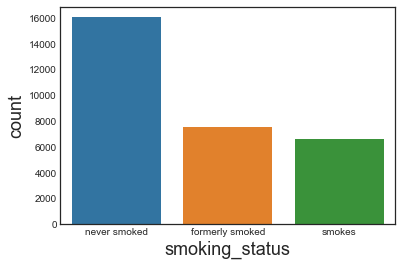

In [9]:
# Visualize count of observations for Stroke or not
sns.countplot(x='smoking_status', data=d)

In [10]:
# Since most of the data has smoking_status as 'formerly smoked', we will fill missing data with this value
# Imputation of missing values for smoking status
d['smoking_status'] = d['smoking_status'].fillna('never smoked')

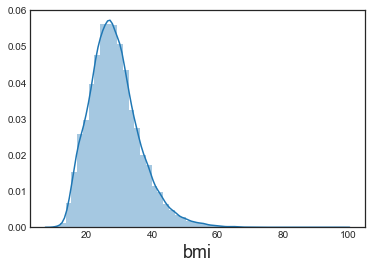

In [11]:
# Distribution of BMI before replacement of missing values
sns.distplot(d[d['bmi'].notnull()]['bmi'])

In [12]:
# We compute mode of bmi excluding missing values in original data.
# Mode is the most repeated value in the given dataset, so it is a robust measure of central tendency
# We will use mode to fill missing values. 
bmi_mode = d.loc[:,'bmi'].mode()

In [13]:
d['bmi'] = d['bmi'].fillna(bmi_mode[0])

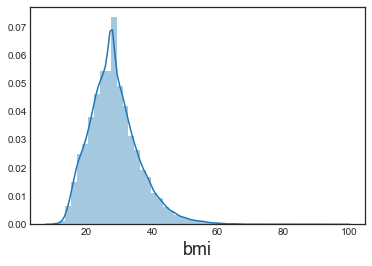

In [14]:
# Distribution of BMI after replacement 
sns.distplot(d['bmi'])

In [15]:
# Outcome variable data distribution
d['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

Note:

The data is completely unbalanced, which is quite normal in real-life data.

We will use 'balanced weight' approach in classficiation algorithms

### Data Visualization

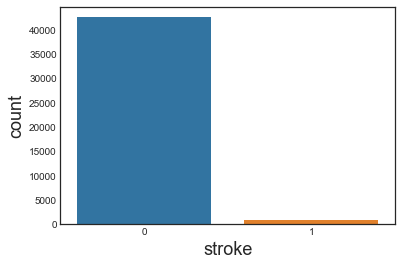

In [16]:
# Visualize count of observations for Stroke or not
sns.countplot(x='stroke', data=d)

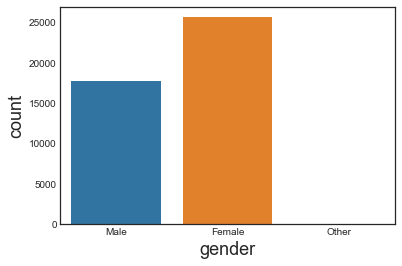

In [17]:
# Visualize count of observations for each gender
sns.countplot(x='gender', data=d)

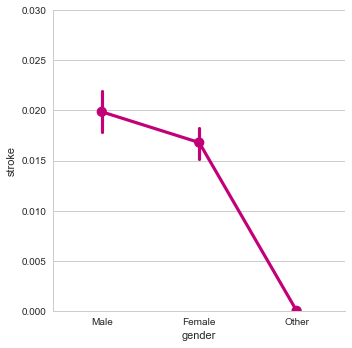

In [18]:
# Occurence of stroke in each gender
sns.set(style="whitegrid")
g = sns.PairGrid(data=d, x_vars=['gender'], y_vars='stroke', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["magenta"])
g.set(ylim=(0, .03))

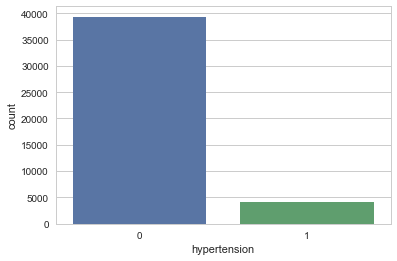

In [19]:
# Visualize count of observations for each gender
sns.countplot(x='hypertension', data=d)

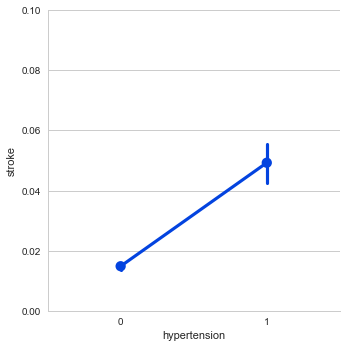

In [20]:
# Occurence of stroke in case hypertension
sns.set(style="whitegrid")
g = sns.PairGrid(data=d, x_vars=['hypertension'], y_vars='stroke', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["blue"])
g.set(ylim=(0, .1))

# Looks like people with hypertension has almost 5 times possibility of stroke than people who dont have hypertension

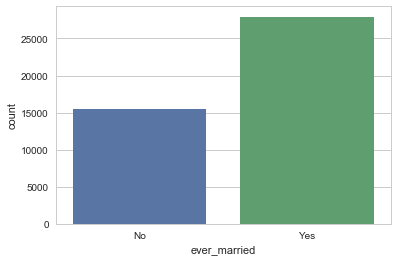

In [21]:
# Visualize count of observations for each gender
sns.countplot(x='ever_married', data=d)

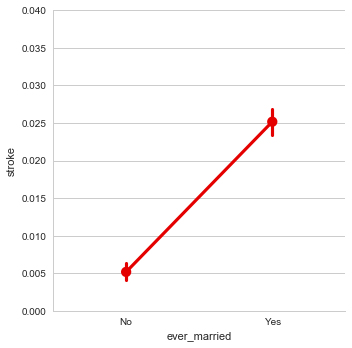

In [22]:
# Occurence of stroke in case married Vs non-married
sns.set(style="whitegrid")
g = sns.PairGrid(data=d, x_vars=['ever_married'], y_vars='stroke', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, .04))

# Looks like people who are married have almost 5 times possibility of stroke than people who are not-married

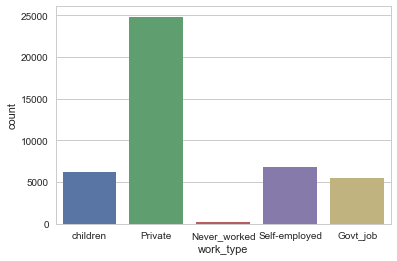

In [23]:
# Visualize count of observations for each gender
sns.countplot(x='work_type', data=d)

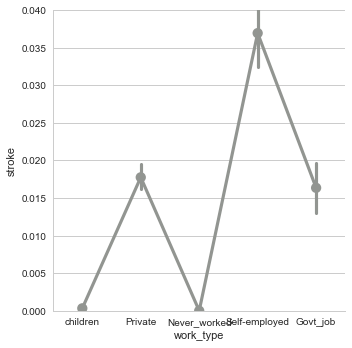

In [24]:
# Occurence of stroke in case of job-type
sns.set(style="whitegrid")
g = sns.PairGrid(data=d, x_vars=['work_type'], y_vars='stroke', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["grey"])
g.set(ylim=(0, .04))

# People who are self-employed have highest stroke occurence
# Childern and people who never worked have no stroke occurence
# People who work in private and govt jobs have substantially less occurence of stroke

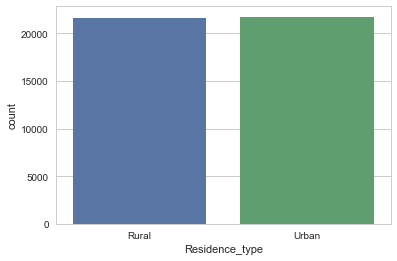

In [25]:
# Visualize count of observations for place of residence
sns.countplot(x='Residence_type', data=d)

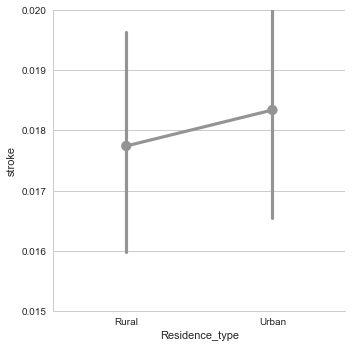

In [26]:
# Occurence of stroke in case married Vs non-married
sns.set(style="whitegrid")
g = sns.PairGrid(data=d, x_vars=['Residence_type'], y_vars='stroke', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["grey"])
g.set(ylim=(0.015, .02))


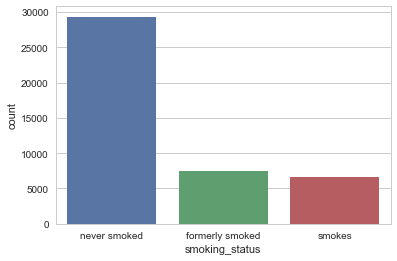

In [27]:
# Visualize count of observations for smoking status
sns.countplot(x='smoking_status', data=d)

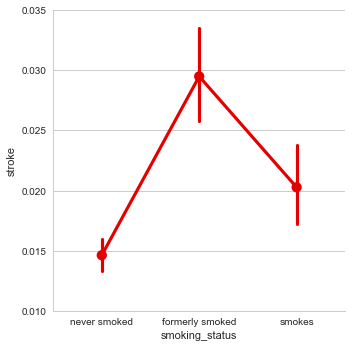

In [28]:
# Occurence of stroke in case married Vs non-married
sns.set(style="whitegrid")
g = sns.PairGrid(data=d, x_vars=['smoking_status'], y_vars='stroke', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0.01, .035))

# People who have formerly smoked have higher chances of stroke than who never smoked

### Data Analysis

- Categorical Variables: 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'

- Continuous Variables" 'age', 'avg_glucose_level', 'bmi'

Since our data contains categorical variables, we will get dummy variables for them

In [29]:
# Categorical features of interest
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Get dummy variables
cat_data = pd.get_dummies(d[cat_features])

In [30]:
# Continuous features 
cont_features = ['age', 'avg_glucose_level', 'bmi']
cont_data = d[cont_features]

In [31]:
# Features - Combine continous and categorical dummy data to form feature sets

X_tr = pd.concat([cont_data, cat_data], axis=1)

In [32]:
# Label - the outcome variable
y = d['stroke']

Split the data into train and test sets

In [33]:
train_X, test_X, train_y, test_y = train_test_split(X_tr, y, test_size=0.3, stratify=y)

### Define algorithm instances and apply models on the dataset

In [34]:
# Fit Logistic Regression Model on Training Data
lr = LogisticRegression(random_state=0, class_weight='balanced')
lr = lr.fit(train_X, train_y)
pred_lr = lr.predict(test_X)
score_lr = round(lr.score(test_X, test_y)*100,2)


In [35]:
# Fit KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(train_X, train_y)
pred_knn = knn.predict(test_X)
score_knn = round(knn.score(test_X, test_y)*100,2)


In [36]:
# Fit DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0, class_weight='balanced')
dt = dt.fit(train_X, train_y)
pred_dt = dt.predict(test_X)
score_dt = round(dt.score(test_X, test_y)*100,2)


In [37]:
# Fit Gaussian Naive Bayes Classifier
gnb = GaussianNB()
gnb = gnb.fit(train_X, train_y)
pred_gnb = gnb.predict(test_X)
score_gnb = round(gnb.score(test_X, test_y)*100,2)


In [38]:
# Fit Perceptron
per = Perceptron(random_state=0, class_weight='balanced')
per = per.fit(train_X, train_y)
pred_per = per.predict(test_X)
score_per = round(per.score(test_X, test_y)*100,2)


In [39]:
# Fit SGDClassifier
sgd = SGDClassifier(random_state=0, class_weight='balanced')
sgd = sgd.fit(train_X, train_y)
pred_sgd = sgd.predict(test_X)
score_sgd = round(sgd.score(test_X, test_y)*100,2)


In [40]:
# Fit GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc = gbc.fit(train_X, train_y)
pred_gbc = gbc.predict(test_X)
score_gbc = round(gbc.score(test_X, test_y)*100,2)


In [41]:
# Fit SVC
svc = SVC(random_state=0, class_weight='balanced')
svc = svc.fit(train_X, train_y)
pred_svc = svc.predict(test_X)
score_svc = round(svc.score(test_X, test_y)*100,2)


In [42]:
# Fot Random Forest Classifier
rf = RandomForestClassifier(random_state=0, class_weight='balanced')
rf = rf.fit(train_X, train_y)
pred_rf = rf.predict(test_X)
score_rf = round(rf.score(test_X, test_y)*100,2)


### Anomaly Detection

In [50]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import scale

In [51]:
data = X_tr

# Make a meshgrid from the input space
xx, yy = np.meshgrid(np.linspace(0, 8, 50), np.linspace(0, 16, 100))

# scikit learn recommended formula
of = 0.1 # Expected Outlier Fraction
nuv = 0.95 * of + 0.05

# Create scikit learn SVC estimator, fit to data, and predict labels
svc1 = OneClassSVM(nu=nuv, kernel="rbf", gamma=0.1)
svc1.fit(data)
preds = svc.predict(data)

# Apply the SVC decision function to meshgrid
z = svc1.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# Create figure
fig, axs = plt.subplots(figsize=(12, 10))

# Draw contours for SVC decision surface
axs.contourf(xx, yy, z, levels=np.linspace(z.min(), 0, 10), 
             cmap=plt.cm.Blues, alpha=0.5)

# Colorize central region where data are marked good
axs.contourf(xx, yy, z, levels=[0, z.max()], 
             colors='orange', alpha=0.75)

# Draw contour line for boundary and set label
cnt = axs.contour(xx, yy, z, levels=[0], linewidths=2, colors='red')
cnt.collections[0].set_label('Learned Boundary')
    
# Plot Iris data
p1 = axs.scatter(x[:-60], y[:-60], 
                 color=sns.xkcd_rgb['denim blue'], s=60, alpha=0.5,
                 label='Raw Data')

# Transpose high noise data
p2 = axs.scatter(x[-60:-40], y[-60:-40], 
                 color=sns.xkcd_rgb['medium green'], s=60, marker='<',
                 label='High Noise')

# Plot transposed feature data
p3 = axs.scatter(x[-40:-20], y[-40:-20], 
                 color=sns.xkcd_rgb['pale red'], s=60, marker='d', alpha=0.65,
                 label='Incorrect Column')

# Plot wrong unit data
p4 = axs.scatter(x[-20:], y[-20:], 
                 color=sns.xkcd_rgb['dusty purple'], s=60, marker='>',
                 label='Wrong Units')

# Now mark the outliers, they have prediction class = -1. 
# To simplify finding them we use a temporary DataFrame
df = pd.DataFrame({'x': x, 'y': y, 'p': preds})
p5 = axs.scatter(df[df.p < 0].x, df[df.p < 0].y, s=100,
                 marker='8', facecolor='none', edgecolor='black',
                 linewidth=1.5, linestyle='-',
                label='SVM Outlier')

# Decorate plot
axs.set(title='Novelty Detection', 
        xlabel='Petal Width (cm)', ylabel='Petal Length (cm)')
axs.legend(bbox_to_anchor=(1.0, 1), loc=2)
sns.despine(offset=10, trim=True)

ValueError: X.shape[1] = 2 should be equal to 20, the number of features at training time

### Compute Performance

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [44]:
# Compute performance metrics
'''
def performance(pred, algorithm):
    mse = mean_squared_error(test_y, pred)
    if(algorithm=='Logistic Regression'):
        score = score_lr
    elif(algorithm=='KNN'):
        score = score_knn
    elif(algorithm=='KNN'):
        score = score_knn
    elif(algorithm=='Decision Tree'):
        score = score_dt
    elif(algorithm=='Gaussian Naive Bayes'):
        score = score_gnb
    elif(algorithm=='Perceptron'):
        score = score_per
    elif(algorithm=='KNN'):
        score = score_knn
    elif(algorithm=='SGD Classifier'):
        score = score_sgd
    elif(algorithm=='Gradient Boosting'):
        score = score_gb
    elif(algorithm=='Support Vector Classification'):
        score = score_svc
    elif(algorithm=='KNN'):
        score = score_knn
    elif(algorithm=='Random Forest Classification'):
        score = score_rf  
    r_square = r2_score(test_y, pred)
    print('Model: {0} --> Mean Squared Error = {1:4.2f},\
    Prediction Accuracy ={2:2.2f}%, R-squared = {3:2.2}'.format(algorithm, mse, score, r_square))

'''

"\ndef performance(pred, algorithm):\n    mse = mean_squared_error(test_y, pred)\n    if(algorithm=='Logistic Regression'):\n        score = score_lr\n    elif(algorithm=='KNN'):\n        score = score_knn\n    elif(algorithm=='KNN'):\n        score = score_knn\n    elif(algorithm=='Decision Tree'):\n        score = score_dt\n    elif(algorithm=='Gaussian Naive Bayes'):\n        score = score_gnb\n    elif(algorithm=='Perceptron'):\n        score = score_per\n    elif(algorithm=='KNN'):\n        score = score_knn\n    elif(algorithm=='SGD Classifier'):\n        score = score_sgd\n    elif(algorithm=='Gradient Boosting'):\n        score = score_gb\n    elif(algorithm=='Support Vector Classification'):\n        score = score_svc\n    elif(algorithm=='KNN'):\n        score = score_knn\n    elif(algorithm=='Random Forest Classification'):\n        score = score_rf  \n    r_square = r2_score(test_y, pred)\n    print('Model: {0} --> Mean Squared Error = {1:4.2f},    Prediction Accuracy ={2:2

In [45]:
#performance(pred_lr, 'Logistic Regression')
#performance(pred_knn, 'KNN')
#performance(pred_rf, 'Random Forest Classification')
#performance(pred_knn, 'Support Vector Classification')

### Receiver Operating Characteristic Curve - Area Under Curve (AUC)

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import auc

In [47]:

# Grab positive class probability
y_score_svm = svc.decision_function(test_X) # For SVC

y_score_dt = dt.predict_proba(test_X)[:, 1] # For Decision Tree Classifier

y_score_lr = lr.decision_function(test_X) # For Logistic Regression

y_score_rf = rf.predict_proba(test_X)[:,1] # For Random Forest

y_score_knn = knn.predict_proba(test_X)[:,1] # For KNN

y_score_gnb = gnb.predict_proba(test_X)[:,1] # For Gaussian NB

y_score_per = per.decision_function(test_X) # For Perceptron

y_score_sgd = sgd.decision_function(test_X) # For SGD Classifier

y_score_gbc = gbc.decision_function(test_X) # For Gradient Boosting Classifier

# Compute ROC curve and ROC area

# For SVC
fpr_svm, tpr_svm, thresholds = roc_curve(test_y, y_score_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# For Decision Tree Classifier
fpr_dt, tpr_dt, thresholds = roc_curve(test_y, y_score_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# For Logistic Regression
fpr_lr, tpr_lr, thresholds = roc_curve(test_y, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# For Random Forest
fpr_rf, tpr_rf, thresholds = roc_curve(test_y, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# For KNN
fpr_knn, tpr_knn, thresholds = roc_curve(test_y, y_score_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# For Gaussian NB
fpr_gnb, tpr_gnb, thresholds = roc_curve(test_y, y_score_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)


fpr_per, tpr_per, thresholds = roc_curve(test_y, y_score_per)
roc_auc_per = auc(fpr_per, tpr_per)

fpr_sgd, tpr_sgd, thresholds = roc_curve(test_y, y_score_sgd)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)

fpr_gbc, tpr_gbc, thresholds = roc_curve(test_y, y_score_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

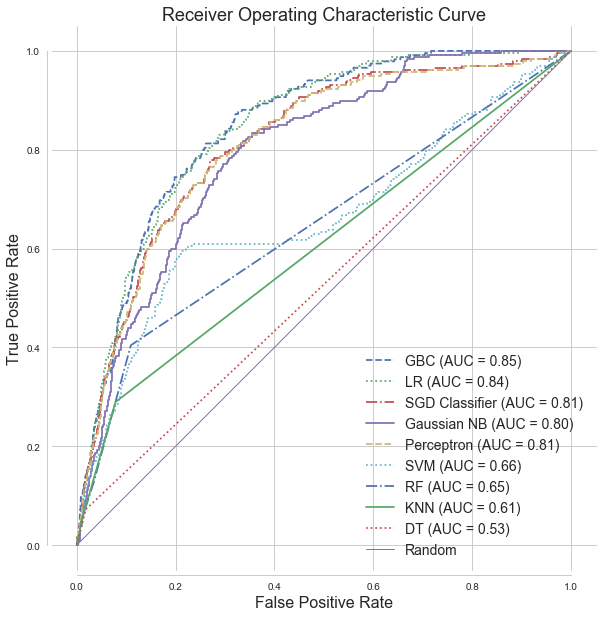

In [48]:
# Make the plots
fig, ax = plt.subplots(figsize=(12, 10))

# Plot data and model

ax.plot(fpr_gbc, tpr_gbc, alpha = 1, linestyle='--',
        label=f'GBC (AUC = {roc_auc_gbc:4.2f})')

ax.plot(fpr_lr, tpr_lr, alpha = 1, linestyle=':',
        label=f'LR (AUC = {roc_auc_lr:4.2f})')

ax.plot(fpr_sgd, tpr_sgd, alpha = 1, linestyle='-.',
        label=f'SGD Classifier (AUC = {roc_auc_sgd:4.2f})')

ax.plot(fpr_gnb, tpr_gnb, alpha = 1, linestyle='-',
        label=f'Gaussian NB (AUC = {roc_auc_gnb:4.2f})')

ax.plot(fpr_per, tpr_per, alpha = 1, linestyle='--',
        label=f'Perceptron (AUC = {roc_auc_per:4.2f})')

ax.plot(fpr_svm, tpr_svm, alpha = 1, linestyle=':',
        label=f'SVM (AUC = {roc_auc_svm:4.2f})')

ax.plot(fpr_rf, tpr_rf, alpha = 1, linestyle='-.',
        label=f'RF (AUC = {roc_auc_rf:4.2f})')

ax.plot(fpr_knn, tpr_knn, alpha = 1, linestyle='-',
        label=f'KNN (AUC = {roc_auc_knn:4.2f})')

ax.plot(fpr_dt, tpr_dt, alpha = 1, linestyle=':',
        label=f'DT (AUC = {roc_auc_dt:4.2f})')

ax.plot([0, 1], [0, 1], alpha = 1, 
        lw=1, linestyle='-', label='Random')

#ax.plot([0, 0, 1], [0, 1, 1], alpha = 0.5, 
#        lw=1, linestyle='-.', label='Perfect')

# Decorate plot appropriately
ax.set_title('Receiver Operating Characteristic Curve', fontsize=18)
ax.set_xlabel('False Positive Rate', fontsize=16)
ax.set_ylabel('True Positive Rate', fontsize=16)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_aspect('equal')
ax.legend(loc=4, fontsize=14)
sns.despine(offset=5, trim=True)

In [49]:
print('Prediction accuracy of basic K-Nearest Neighbour Model ={0:2.2f}%'.format(score_knn))
print('Prediction accuracy of basic Random Forest Classifier Model ={0:2.2f}%'.format(score_rf))
print('Prediction accuracy of basic Gradient Boosting Classification Model ={0:2.2f}%'.format(score_gbc))
print('Prediction accuracy of basic Decision Tree Model ={0:2.2f}%'.format(score_dt))
print('Prediction accuracy of basic Support Vector Classification Model ={0:2.2f}%'.format(score_svc))
print('Prediction accuracy of basic Logistic Regression Model ={0:2.2f}%'.format(score_lr))
print('Prediction accuracy of basic Gaussian Naive Bayes Model ={0:2.2f}%'.format(score_gnb))
print('Prediction accuracy of basic SGD Classification Model ={0:2.2f}%'.format(score_sgd))
print('Prediction accuracy of basic Perceptron Model ={0:2.2f}%'.format(score_per))

Prediction accuracy of basic K-Nearest Neighbour Model =98.10%
Prediction accuracy of basic Random Forest Classifier Model =98.14%
Prediction accuracy of basic Gradient Boosting Classification Model =98.18%
Prediction accuracy of basic Decision Tree Model =96.54%
Prediction accuracy of basic Support Vector Classification Model =93.83%
Prediction accuracy of basic Logistic Regression Model =74.11%
Prediction accuracy of basic Gaussian Naive Bayes Model =43.38%
Prediction accuracy of basic SGD Classification Model =60.41%
Prediction accuracy of basic Perceptron Model =59.95%
